In [1]:
#importing all import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Load Dataset

In [2]:
data=pd.read_csv("Clustering f.csv")
print("File read successfully")

File read successfully


### Printing Head and Tail

In [3]:
data.head()

,TIME,Name,What is your age group ?,Gender,Where are you from ? (City / State / Country),Which destination did you recently visit ? \n(City / State / Country),What was the purpose of your visit ?,What was your travel preference?,What was your expense range for this trip?,What did you find most satisfactory during your trip? (Select up to 3),What did you find most unsatisfactory or disappointing? (Select up to 3),Did you face any difficulties during your trip? (Multiple choice — select all that apply),What improvement would make your next visit better? (Select up to 3),Would you recommend this destination to others ?,How would you rate your overall trip experience ? \n (Scale: ⭐ 1 Very Bad → ⭐ 5 Excellent),Email address,Please describe your overall experience in your own words.,Please share in detail what you found most satisfactory.,Column 15,Column 14
0,9/18/2025 23:59:01,Piyush,18-24,Male,varanasi,varanasi,Family / Friends visit,Solo,Low (Budget-friendly),Food & Restaurants,Food Quality / Availability,"Unhygienic Facilities (Washrooms, Public Places)",Affordable Accommodation,"Yes, definitely",5,NaN,NaN,NaN,NaN,NaN
1,9/19/2025 0:08:54,Priyadarshi prabhat,18-24,Male,Muzaffarpur,Uttarakhand,Family / Friends visit,Friends,Low (Budget-friendly),Tourist Attractions,Hotel / Accommodation Service,"Unhygienic Facilities (Washrooms, Public Places)",Improved Safety & Security,"Yes, definitely",4,NaN,NaN,NaN,NaN,NaN
2,9/19/2025 0:18:01,Niket Kumar,18-24,Male,Patna,SAROJNI,Leisure / Vacation,Solo,Low (Budget-friendly),Shopping,Transportation Issues,High Transportation Costs,Better Food Options,"Yes, definitely",3,NaN,NaN,NaN,NaN,NaN
3,9/19/2025 0:19:23,Isha singh,18-24,Female,Bihar,Greater Noida,Education / Study,Family,Medium (Moderate spending),Accommodation / Hotel Service,High Cost / Expensive Services,Poor Internet / Mobile Connectivity,Affordable Accommodation,Maybe / Not Sure,3,NaN,NaN,NaN,NaN,NaN
4,9/19/2025 0:20:40,Raushni Yadav,18-24,Female,Patna,Shivaji park,Business / Work,Family,Medium (Moderate spending),Shopping,High Cost / Expensive Services,Poor Internet / Mobile Connectivity,Better Transportation Facilities,"Yes, definitely",5,NaN,NaN,NaN,NaN,NaN


In [4]:
data.tail()

,TIME,Name,What is your age group ?,Gender,Where are you from ? (City / State / Country),Which destination did you recently visit ? \n(City / State / Country),What was the purpose of your visit ?,What was your travel preference?,What was your expense range for this trip?,What did you find most satisfactory during your trip? (Select up to 3),What did you find most unsatisfactory or disappointing? (Select up to 3),Did you face any difficulties during your trip? (Multiple choice — select all that apply),What improvement would make your next visit better? (Select up to 3),Would you recommend this destination to others ?,How would you rate your overall trip experience ? \n (Scale: ⭐ 1 Very Bad → ⭐ 5 Excellent),Email address,Please describe your overall experience in your own words.,Please share in detail what you found most satisfactory.,Column 15,Column 14
172,9/26/2025 15:38:12,Aryan raj singh \n,Under 18,Male,Greater Noida/Uttar Pradesh/India \n,Delhi/india,Family / Friends visit,Friends,Low (Budget-friendly),"Food & Restaurants, Local People & Culture, To...",Safety & Security Concerns,High Transportation Costs,Better Transportation Facilities,"Yes, definitely",5,NaN,NaN,NaN,NaN,NaN
173,9/26/2025 18:37:33,Atul yadav,18-24,Male,uttarpradesh,Mp,Business / Work,Solo,Low (Budget-friendly),Food & Restaurants,Food Quality / Availability,Language Barrier,Better Transportation Facilities,"Yes, definitely",5,NaN,NaN,NaN,NaN,NaN
174,9/26/2025 18:38:23,Furktar Singh,45-60,Male,Andhra Pradesh,Paris,Business / Work,Solo,Medium (Moderate spending),"Local People & Culture, Accommodation / Hotel ...","High Cost / Expensive Services, Tourist Crowds...","High Transportation Costs, Unhygienic Faciliti...","Improved Safety & Security, More Cleanliness &...","Yes, definitely",4,NaN,NaN,NaN,NaN,NaN
175,9/27/2025 10:51:10,Nitish Singh,18-24,Male,Greater Noida,Mathura,Family / Friends visit,Friends,High (Luxury travel),"Local People & Culture, Accommodation / Hotel ...",Food Quality / Availability,Poor Internet / Mobile Connectivity,Better Food Options,"Yes, definitely",5,NaN,NaN,NaN,NaN,NaN
176,9/29/2025 10:47:33,ved prakash ranjan,18-24,Male,BIHAR,NEW DELHI,Education / Study,Solo,Medium (Moderate spending),"Food & Restaurants, Shopping",Tourist Crowds / Overcrowding,High Transportation Costs,"More Cleanliness & Hygiene, Better Food Options","Yes, definitely",4,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 20 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   TIME                                                                                             177 non-null    object 
 1   Name                                                                                             177 non-null    object 
 2   What is your age group ?                                                                         177 non-null    object 
 3   Gender                                                                                           177 non-null    object 
 4   Where are you from ? (City / State / Country)                                                    177 non-null    object 
 5   Which de

In [6]:
data.describe()

,How would you rate your overall trip experience ? \n (Scale: ⭐ 1 Very Bad → ⭐ 5 Excellent),Email address,Please describe your overall experience in your own words.,Please share in detail what you found most satisfactory.,Column 15,Column 14
count,177.000000,0.0,0.0,0.0,0.0,0.0
mean,4.209040,NaN,NaN,NaN,NaN,NaN
std,0.870167,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,4.000000,NaN,NaN,NaN,NaN,NaN
50%,4.000000,NaN,NaN,NaN,NaN,NaN
75%,5.000000,NaN,NaN,NaN,NaN,NaN
max,5.000000,NaN,NaN,NaN,NaN,NaN


### Finding Null Value Count

In [7]:
data.isnull().sum()

TIME                                                                                                  0
Name                                                                                                  0
What is your age group ?                                                                              0
Gender                                                                                                0
Where are you from ? (City / State / Country)                                                         0
Which destination did you recently visit ?  \n(City / State / Country)                                0
What was the purpose of your visit ?                                                                  0
What was your travel preference?                                                                      0
  What was your expense range for this trip?                                                          0
What did you find most satisfactory during your trip? (Select up

### Data Cleaning

In [8]:
#Clean up spaces in all column names
data.columns=data.columns.str.strip()

#Check cleaned names
print (data.columns)

Index(['TIME', 'Name', 'What is your age group ?', 'Gender',
       'Where are you from ? (City / State / Country)',
       'Which destination did you recently visit ?  \n(City / State / Country)',
       'What was the purpose of your visit ?',
       'What was your travel preference?',
       'What was your expense range for this trip?',
       'What did you find most satisfactory during your trip? (Select up to 3)',
       'What did you find most unsatisfactory or disappointing? (Select up to 3)',
       'Did you face any difficulties during your trip? (Multiple choice — select all that apply)',
       'What improvement would make your next visit better? (Select up to 3)',
       'Would you recommend this destination to others ?',
       'How would you rate your overall trip experience ?  \n  (Scale: ⭐ 1 Very Bad → ⭐ 5 Excellent)',
       'Email address',
       'Please describe your overall experience in your own words.',
       'Please share in detail what you found most satisfacto

### Data Visualization

<b><u>Count Plot</b></u>

On the basis of Gender

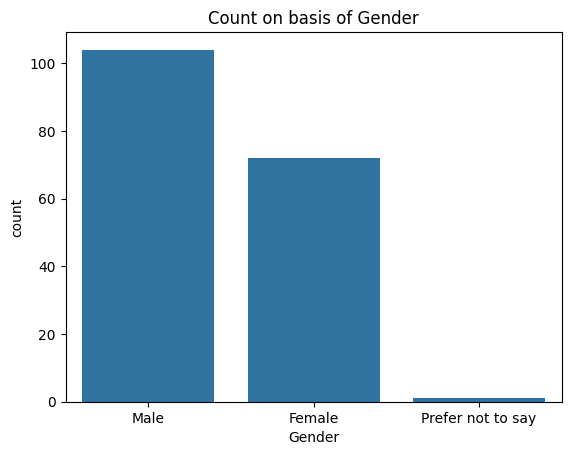

In [9]:
sns.countplot(x='Gender',data=data)
plt.title('Count on basis of Gender')
plt.show()

On the basis of Age group

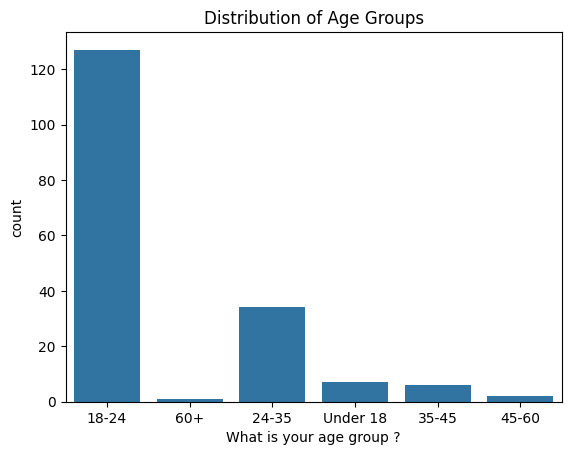

In [10]:
sns.countplot(x='What is your age group ?',data=data)
plt.title('Distribution of Age Groups')
plt.show()

On the basis of purpose of visit

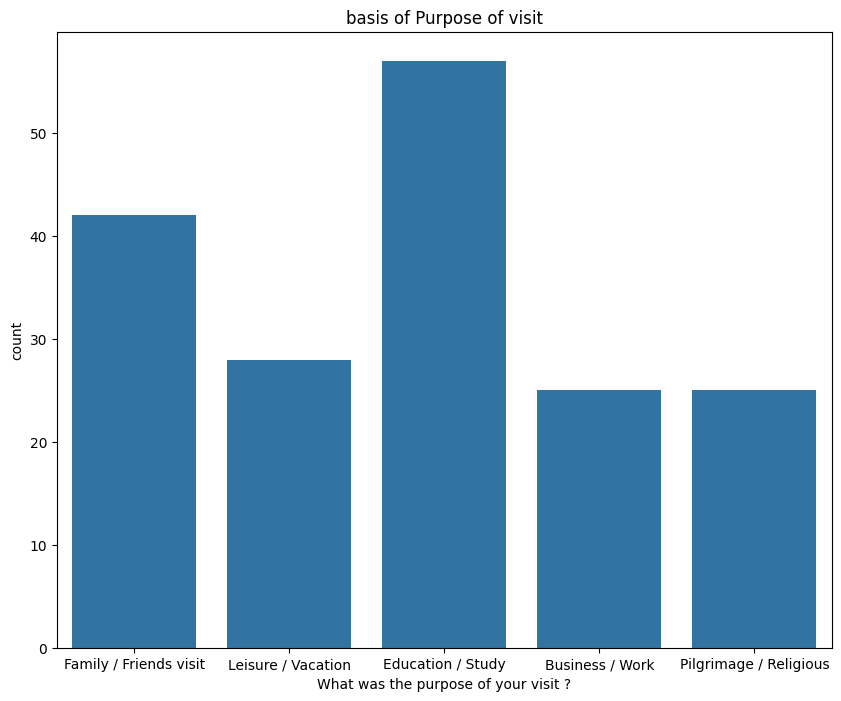

In [11]:
plt.figure(figsize=(10,8))
sns.countplot(x='What was the purpose of your visit ?',data=data)
plt.title('basis of Purpose of visit')
plt.show()

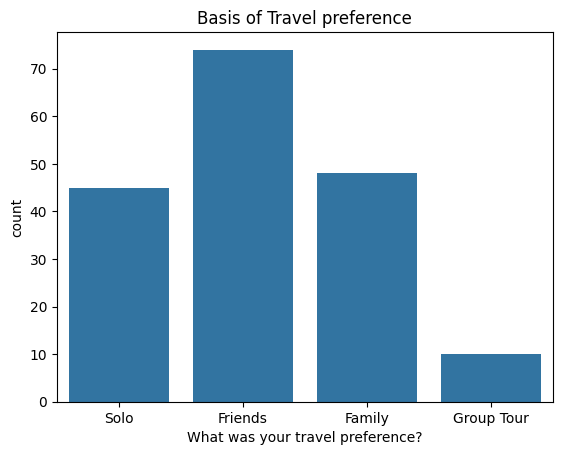

In [12]:
sns.countplot(x='What was your travel preference?',data=data)
plt.title('Basis of Travel preference')
plt.show()

Clean Columns

In [13]:
# Clean column names (remove spaces, \n, special chars)
data.columns = data.columns.str.strip().str.replace("\n", " ").str.replace("  ", " ")

In [14]:
data['Age_num'] = data['What is your age group ?'].str.extract('(\d+)').astype(int)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\acer\AppData\Local\Temp\ipykernel_2440\1283628527.py:1: SyntaxWarning: invalid escape sequence '\d'
  data['Age_num'] = data['What is your age group ?'].str.extract('(\d+)').astype(int)


In [15]:
rating_col = [col for col in data.columns if "rate your overall trip experience" in col.lower()][0]

### <u>Scatter Plot</u>

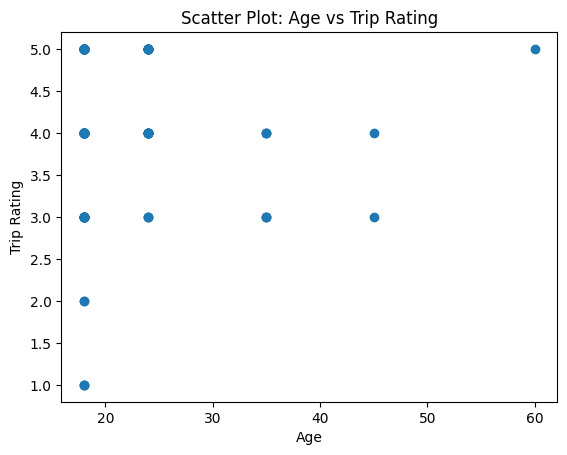

In [16]:
plt.scatter(data['Age_num'], data[rating_col])

plt.xlabel("Age")
plt.ylabel("Trip Rating")
plt.title("Scatter Plot: Age vs Trip Rating")

plt.show()


### <u>Pie Charts</u>

Basis of Gender

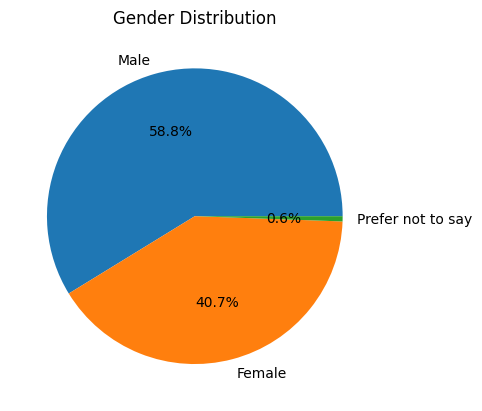

In [17]:
gender_counts = data['Gender'].value_counts()

plt.pie(gender_counts.values,
        labels=gender_counts.index,
        autopct='%1.1f%%')

plt.title("Gender Distribution")
plt.show()


Basis of Age Distribution

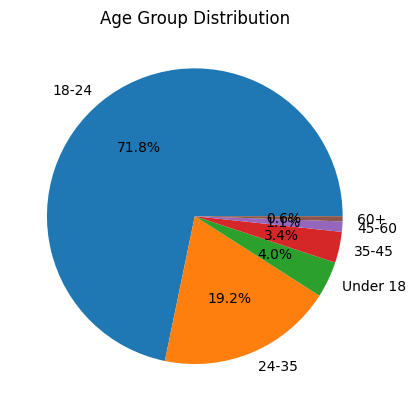

In [18]:
age_counts = data['What is your age group ?'].value_counts()

plt.pie(age_counts.values,
        labels=age_counts.index,
        autopct='%1.1f%%')

plt.title("Age Group Distribution")
plt.show()


Basis of Purpose your visit

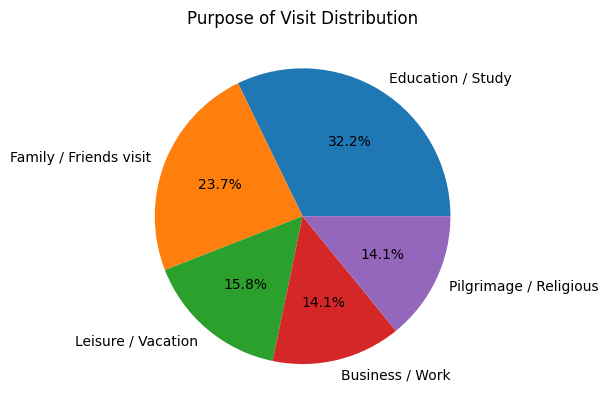

In [19]:
purpose_counts = data['What was the purpose of your visit ?'].value_counts()

plt.pie(purpose_counts.values,
        labels=purpose_counts.index,
        autopct='%1.1f%%')

plt.title("Purpose of Visit Distribution")
plt.show()


### Heatmap

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\seaborn\utils.py:61: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


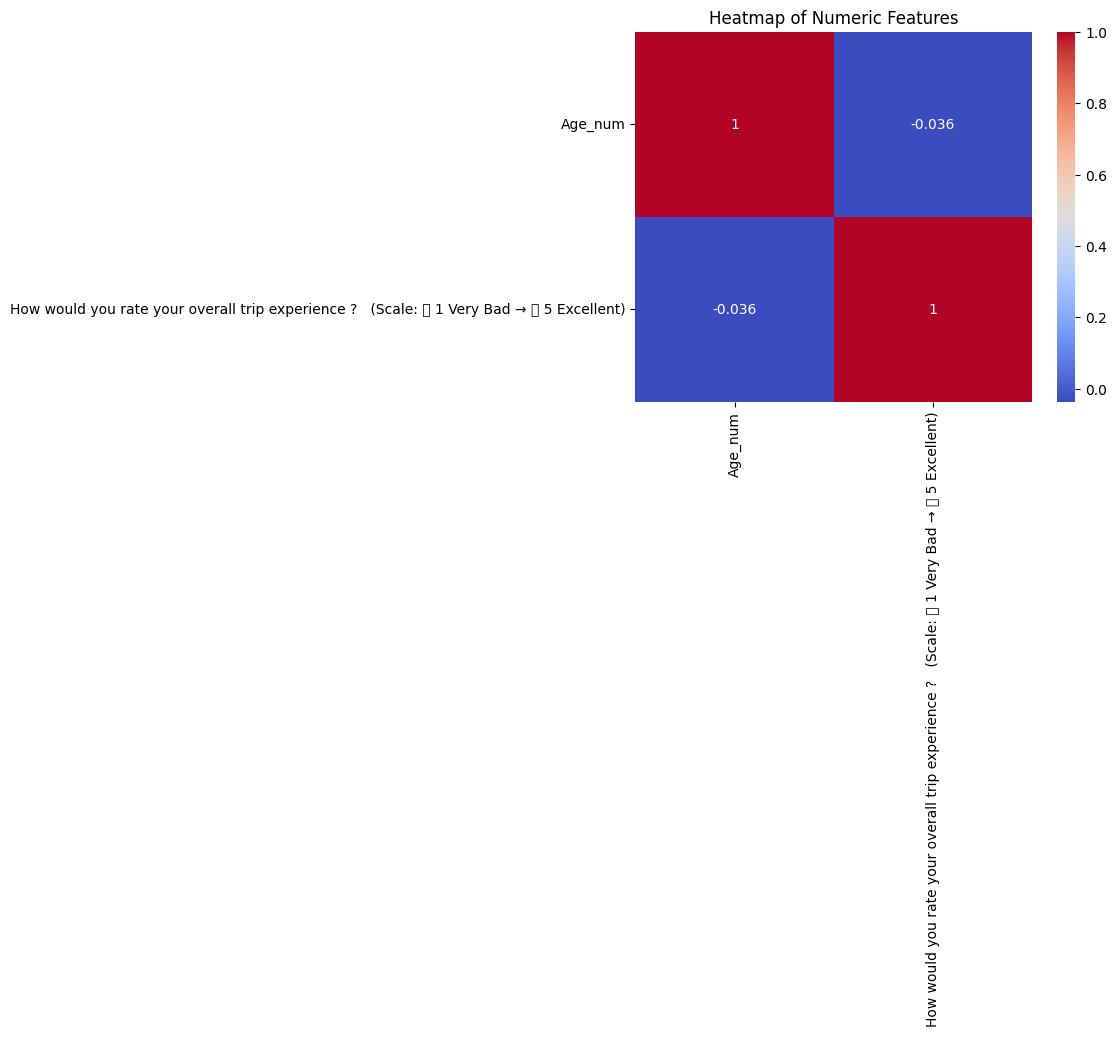

In [20]:
corr = data[['Age_num', rating_col]].corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title("Heatmap of Numeric Features")
plt.show()

### Histogram

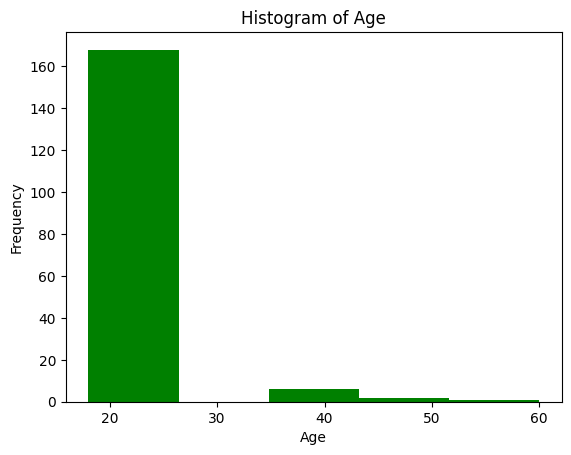

In [21]:
plt.hist(data['Age_num'], bins=5,color='green')

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age")
plt.show()

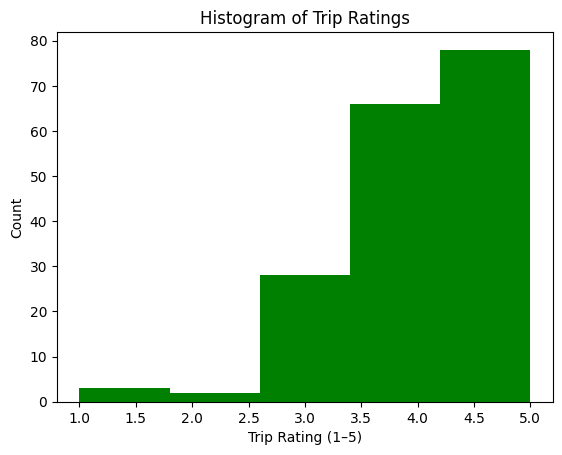

In [22]:
plt.hist(data[rating_col], bins=5, color='green')

plt.xlabel("Trip Rating (1–5)")
plt.ylabel("Count")
plt.title("Histogram of Trip Ratings")
plt.show()

### Data Validation

In [23]:
# Drop unwanted columns
drop_cols = ["TIME","Name","Email address",
             "Please describe your overall experience in your own words.",
             "Please share in detail what you found most satisfactory.",
             "Column 14","Column 15"]

data = data.drop(columns=[c for c in drop_cols if c in data.columns], errors="ignore")

# Encode categorical columns
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == "object":
        data[col] = le.fit_transform(data[col].astype(str))

In [24]:
# Target variable
target = "How would you rate your overall trip experience ?   (Scale: ⭐ 1 Very Bad → ⭐ 5 Excellent)"
y = data[target]
X = data.drop(columns=[target])
X = X.select_dtypes(include=[np.number])  # numeric only

In [25]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training Logistic Model

In [26]:
# Logistic Regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [27]:
# Predictions
y_pred = model.predict(X_test)

In [28]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.4166666666666667
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.50      0.25      0.33         4
           4       0.50      0.24      0.32        17
           5       0.43      0.71      0.54        14

    accuracy                           0.42        36
   macro avg       0.29      0.24      0.24        36
weighted avg       0.46      0.42      0.40        36



C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731:

### PCA

In [29]:
x=data.drop('Gender',axis=1)
y=data['Gender']

In [30]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(data)

In [31]:
newdf=pd.DataFrame(x_scaled)
newdf.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02
mean,-9.032323e-17,-3.261672e-17,-2.007183e-17,4.014366e-17,-4.892508e-17,6.774242e-17,-1.204310e-16,9.785016e-17,1.129040e-17,2.508979e-18,1.003591e-17,-4.767059e-17,3.274217e-16,9.032323e-17
std,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00
min,-4.609264e-01,-1.194106e+00,-1.512557e+00,-1.650874e+00,-1.459234e+00,-1.153363e+00,-2.018035e+00,-1.568161e+00,-1.646487e+00,-1.429973e+00,-1.662588e+00,-2.109223e+00,-3.698305e+00,-4.163499e-01
25%,-4.609264e-01,-1.194106e+00,-9.890363e-01,-9.600198e-01,-6.645128e-01,-1.153363e+00,-6.117665e-01,-9.875629e-01,-8.808741e-01,-9.726458e-01,-8.434726e-01,5.014935e-01,-2.409107e-01,-4.163499e-01
50%,-4.609264e-01,7.998255e-01,-5.833326e-02,2.311854e-02,1.302086e-01,-2.618991e-01,7.945020e-01,-1.989996e-02,1.984638e-02,2.468936e-01,-6.746807e-02,5.014935e-01,-2.409107e-01,-4.163499e-01
75%,4.356008e-01,7.998255e-01,9.887077e-01,9.531143e-01,9.249300e-01,1.521029e+00,7.945020e-01,8.703499e-01,9.205669e-01,1.009106e+00,8.378706e-01,5.014935e-01,9.115542e-01,-4.163499e-01
max,4.021710e+00,2.793757e+00,1.715819e+00,1.670540e+00,1.719651e+00,1.521029e+00,7.945020e-01,1.567067e+00,1.551071e+00,1.517247e+00,1.786321e+00,5.014935e-01,9.115542e-01,7.283016e+00


In [32]:
y_num=pd.factorize(y)[0]

In [33]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)

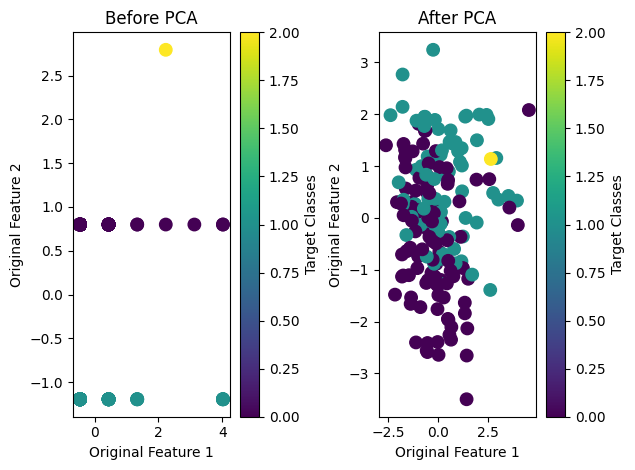

In [34]:
plt.subplot(1,2,1)
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=y_num,s=80)
plt.xlabel("Original Feature 1")
plt.ylabel("Original Feature 2")
plt.title("Before PCA")
plt.colorbar(label='Target Classes')

plt.subplot(1,2,2)
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_num,s=80)
plt.xlabel("Original Feature 1")
plt.ylabel("Original Feature 2")
plt.title("After PCA")
plt.colorbar(label='Target Classes')
plt.tight_layout()
plt.show()

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.3,random_state=42)

modelp=LogisticRegression()
modelp.fit(x_train,y_train)
pcaPred=modelp.predict(x_test)

### KMeans

In [36]:
kmeans=KMeans(n_clusters=3)

kmeans.fit(x)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [37]:
centroids=kmeans.cluster_centers_   #finding the centroid quardinate

labels=kmeans.labels_  #grouping the labelled data

In [38]:
print("Center Points-\n",centroids)
print("Cluster Label-\n",labels)

Center Points-
 [[ 0.77083333 20.04166667 28.89583333  1.54166667  1.20833333  1.3125
  32.5625     34.85416667 27.9375     39.08333333  1.72916667  4.02083333
  20.8125    ]
 [ 0.36       50.77333333 99.8         2.10666667  1.41333333  1.44
  43.84       38.42666667 30.50666667 38.41333333  1.53333333  4.25333333
  20.13333333]
 [ 0.5        82.12962963 39.35185185  1.72222222  1.2037037   1.53703704
  42.96296296 35.48148148 25.03703704 38.31481481  1.62962963  4.31481481
  19.98148148]]
Cluster Label-
 [1 1 1 0 1 1 2 0 1 0 0 1 1 0 0 0 0 2 1 2 0 0 1 1 0 0 1 1 1 0 2 2 0 2 2 1 1
 2 2 2 2 2 2 2 1 1 2 2 2 0 2 0 1 0 1 1 2 1 2 0 1 1 0 0 1 0 2 0 0 1 2 0 2 1
 2 1 2 1 0 1 0 2 1 0 1 0 2 0 1 1 0 1 0 0 0 1 0 2 0 0 1 1 2 2 1 2 2 0 1 2 2
 1 2 0 1 1 1 1 1 2 2 0 2 1 1 0 2 1 0 2 1 0 1 1 2 1 1 0 2 2 1 1 1 1 2 1 2 2
 1 1 1 2 1 2 2 1 1 1 0 1 2 0 1 1 2 1 2 1 1 2 1 1 0 2 1 0 0]


In [40]:
x = x.values

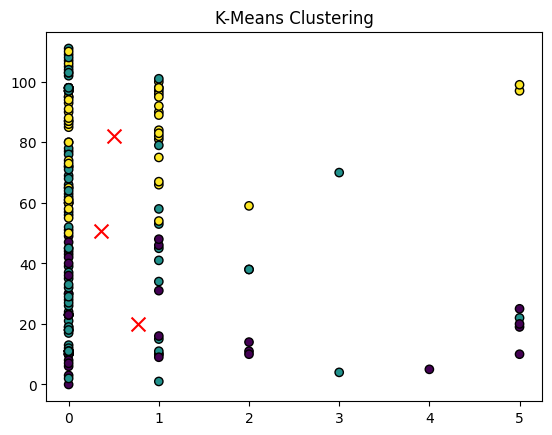

In [41]:
plt.scatter(x[:,0], x[:,1], c=labels, cmap='viridis', edgecolors='k')
plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', s=100, label='Centroids')
plt.title("K-Means Clustering")
plt.show()